In [ ]:
import os
import pathlib
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cur_path = '/content/drive/MyDrive/Traffic_sing_my_vgg16_new_model/'

In [ ]:
os.chdir('/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/')

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 612M/612M [00:29<00:00, 23.7MB/s]
100% 612M/612M [00:29<00:00, 22.1MB/s]


In [ ]:
current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: /content/drive/MyDrive/Traffic_sing_my_new_vgg16_model


In [ ]:
!unzip /content/drive/MyDrive/Traffic_sing_my_vgg16_new_model/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
image_data = []
image_labels = []
total_classes = 43
height = 64
width = 64
channels = 3
input_path = '/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/'

for i in range(total_classes):
    path = input_path + 'Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

image_data = np.array(image_data)
image_labels = np.array(image_labels)

/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/0
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/1
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/2
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/3
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/4
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/5
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/6
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/7
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/8
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/9
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/10
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/11
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/12
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/13
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Train/14
/content/drive/MyDrive/Traffic_sing_my_new_vgg16_m

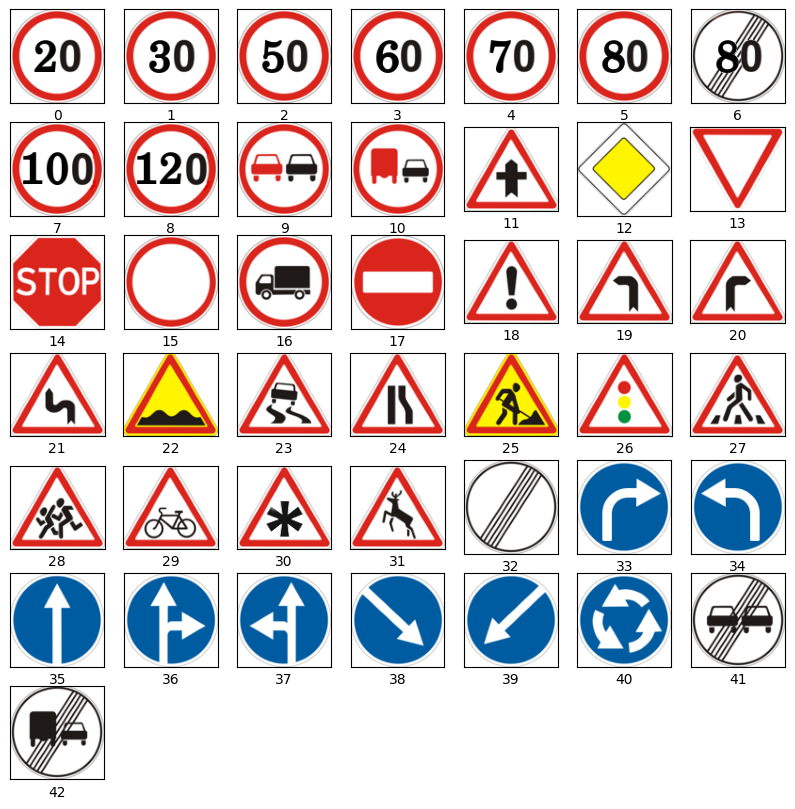

In [ ]:
dir = '/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model'

plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = dir + "/meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (13635, 64, 64, 3)
X_valid.shape (3409, 64, 64, 3)
y_train.shape (13635,)
y_valid.shape (3409,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(13635, 43)
(3409, 43)


In [ ]:
vgg16 = VGG16(input_shape=(64,64,3), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
add_model = Sequential()
add_model.add(Flatten(input_shape=vgg16.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))



add_model.add(Dense(y_train.shape[1], activation='softmax'))

model = Model(inputs=vgg16.input, outputs=add_model(vgg16.output))
learning_rate = 0.0001
def results(model):
  adam = Adam(lr=learning_rate)
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs,
validation_data=(X_valid, y_valid))

Epoch 1/10
107/107 [==============================] - 20s 112ms/step - loss: 0.6289 - accuracy: 0.7949 - val_loss: 0.3893 - val_accuracy: 0.8577
Epoch 2/10
107/107 [==============================] - 6s 53ms/step - loss: 0.2472 - accuracy: 0.9228 - val_loss: 0.2405 - val_accuracy: 0.9097
Epoch 3/10
107/107 [==============================] - 6s 54ms/step - loss: 0.1595 - accuracy: 0.9497 - val_loss: 0.1507 - val_accuracy: 0.9551
Epoch 4/10
107/107 [==============================] - 5s 51ms/step - loss: 0.1148 - accuracy: 0.9646 - val_loss: 0.1181 - val_accuracy: 0.9616
Epoch 5/10
107/107 [==============================] - 6s 59ms/step - loss: 0.0829 - accuracy: 0.9769 - val_loss: 0.1087 - val_accuracy: 0.9657
Epoch 6/10
107/107 [==============================] - 6s 57ms/step - loss: 0.0659 - accuracy: 0.9822 - val_loss: 0.0974 - val_accuracy: 0.9677
Epoch 7/10
107/107 [==============================] - 6s 57ms/step - loss: 0.0552 - accuracy: 0.9850 - val_loss: 0.1178 - val_accuracy: 0.96

In [ ]:
model.save("/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/modelvgg16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


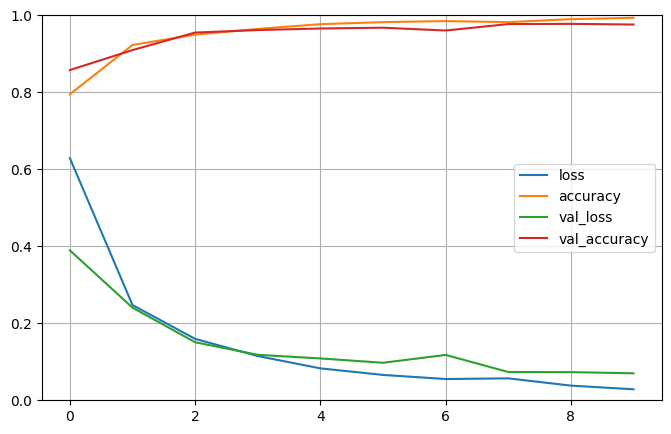

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

test = pd.read_csv('/content/drive/MyDrive/Traffic_sing_my_new_vgg16_model/Test.csv')

labels = test["ClassId"].values
test_imgs = test["Path"].values

In [ ]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }